In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DL\final_exam practical dataset.csv")
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data.set_index('date', inplace=True) 

In [4]:
# Select the 'meantemp' column for forecasting
temperature_data = data['meantemp'].values.reshape(-1, 1)

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(temperature_data)

In [6]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [7]:
# Define the time step
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Train RMSE: 11.26604997376921, Test RMSE: 11.63005323680216


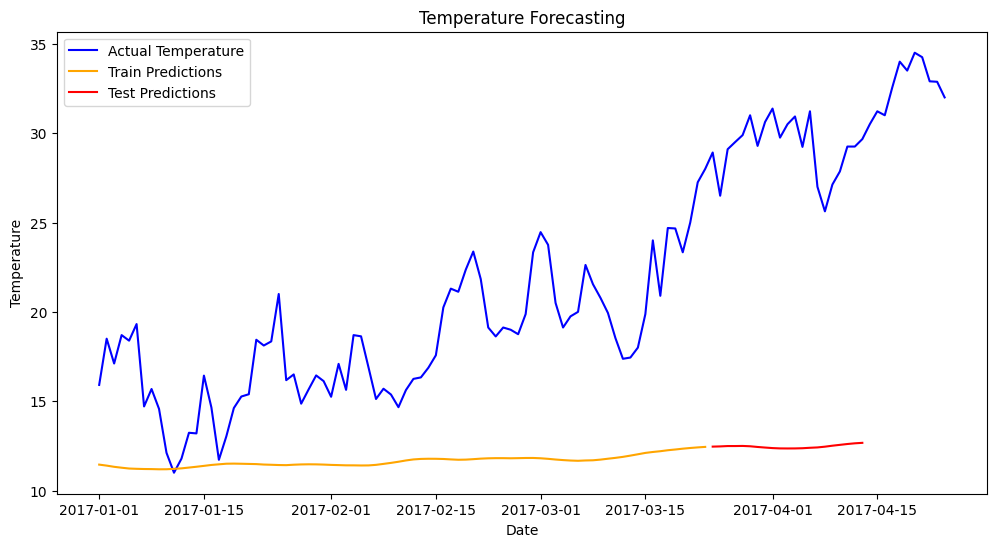

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, temperature_data, label='Actual Temperature', color='blue')
train_size = len(train_predict)
test_size = len(test_predict)
plt.plot(data.index[:train_size], train_predict, label='Train Predictions', color='orange')
plt.plot(data.index[train_size:train_size + test_size], test_predict, label='Test Predictions', color='red')
plt.title('Temperature Forecasting')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [12]:
# Forecasting future temperatures
future_steps = 30  # Number of days to forecast
last_data = scaled_data[-time_step:].reshape(1, time_step, 1)

future_predictions = []

for _ in range(future_steps):
    next_pred = model.predict(last_data)
    future_predictions.append(next_pred[0, 0])
    last_data = np.append(last_data[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

In [13]:
# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [14]:
# Create dates for future predictions
last_date = data.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]

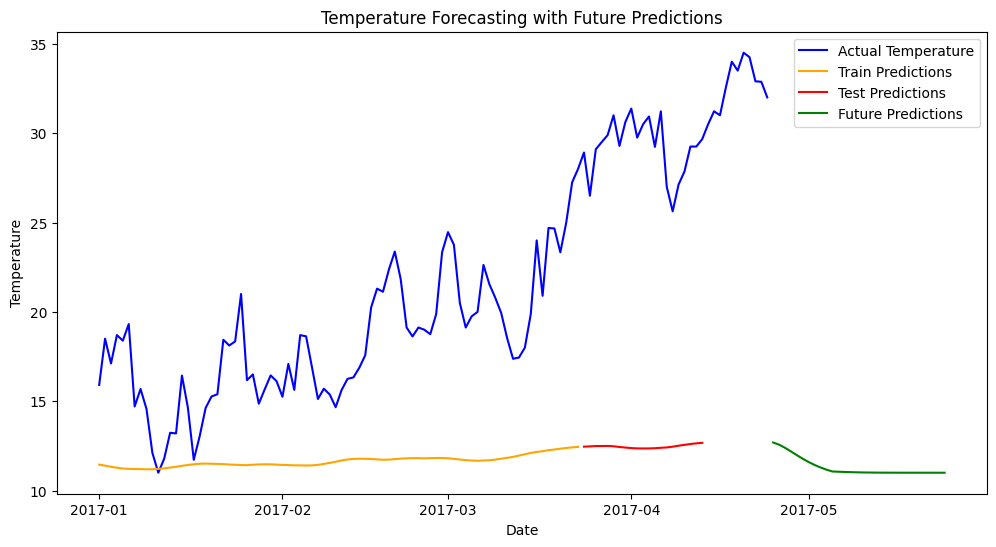

In [15]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, temperature_data, label='Actual Temperature', color='blue')
plt.plot(data.index[:train_size], train_predict, label='Train Predictions', color='orange')
plt.plot(data.index[train_size:train_size + test_size], test_predict, label='Test Predictions', color='red')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green')
plt.title('Temperature Forecasting with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [22]:
# Create a DataFrame for future predictions
future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Temperature'])

# Save to CSV
future_df.to_csv(r'C:\Users\HP\OneDrive\Desktop\DL\future_temperature_predictions.csv')

# Display future predictions
print("Future Temperature Predictions:")
print(future_df)

Future Temperature Predictions:
            Predicted Temperature
2017-04-25              12.691773
2017-04-26              12.568959
2017-04-27              12.395353
2017-04-28              12.192603
2017-04-29              11.982131
2017-04-30              11.783210
2017-05-01              11.598202
2017-05-02              11.434097
2017-05-03              11.294444
2017-05-04              11.172734
2017-05-05              11.069963
2017-05-06              11.056339
2017-05-07              11.043817
2017-05-08              11.032964
2017-05-09              11.024008
2017-05-10              11.016924
2017-05-11              11.011524
2017-05-12              11.007580
2017-05-13              11.004831
2017-05-14              11.003022
2017-05-15              11.001950
2017-05-16              11.001436
2017-05-17              11.001030
2017-05-18              11.000721
2017-05-19              11.000495
2017-05-20              11.000334
2017-05-21              11.000222
2017-05-22      